# Contours-based filtering

In [3]:
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank
from methods.contours_utils import *

In [4]:
np.random.seed(0) 

# signal parameters
SNRin = 20
N = 2**9

sbank = SignalBank(N=N)
# s = sbank.signal_tone_sharp_attack()
# s = sbank.signal_mc_double_cos_chirp()
# s = sbank.signal_mc_modulated_tones()
# s = sbank.signal_mc_multi_linear()
# s = sbank.signal_mc_synthetic_mixture()
# s = sbank.signal_mc_synthetic_mixture_2()
# s= sbank.signal_mc_impulses()
# s= sbank.signal_hermite_function()
s = sbank.signal_linear_chirp()

In [5]:
signal = add_snr(s,SNRin)
Nfft = N
g,_ = get_round_window(Nfft)
S, stft, stft_padded, Npad = get_spectrogram(signal, window = g)

indicator, _, _ = compute_contours(signal)
dict_output = contours_filtering(signal, q = 0.99, dict_output=True) 
xr, mask, contours, basins = (i for i in dict_output.values())
ceros = zeros_finder(stft)
print(10*np.log10((np.sum(s**2))/(np.sum((s-xr)**2))))


27.2556295371372


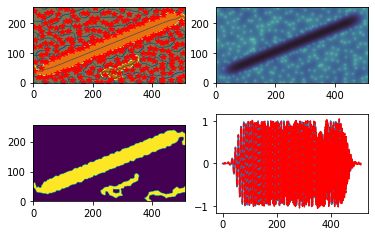

In [6]:
fig, axs = plt.subplots(2,2)
aux = np.zeros(indicator.shape)
for basin in basins:
    aux[basin[:,0],basin[:,1]] = np.random.randint(low = 1, high= 1500)

axs[0,0].imshow(aux, origin = 'lower', cmap = plt.cm.jet)
axs[0,0].imshow(-indicator, alpha = 0.5, origin = 'lower')
axs[0,0].plot(ceros[:,1],ceros[:,0],'r*')
axs[0,1].imshow(np.log10(S), origin='lower', cmap=cmocean.cm.deep)
axs[1,0].imshow(mask, origin = 'lower')
axs[1,1].plot(s)
axs[1,1].plot(xr,'r--')
plt.show()